In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

guns = pd.read_csv("GunDeaths.csv", index_col=0)

Let peak into our data

In [109]:
print(guns.shape)
guns.head()

(100798, 10)


,year,month,intent,police,sex,age,race,hispanic,place,education
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


So we have 10 columns and over 10k datapoints. Let's give a description of the columns:
1. Year: year when incident occured
2. Month: month when incident occured
3. Intent: intent of the crime via the perpetrator, can be:
    + Suicide
    + Accidental
    + NA
    + Homicide
    + Undetermined
4. Police: whether the police were involved in the shooting or not
5. Sex: victim's gender
6. Age: victim's age
7. Race: victim's race, can be:
    + Asian/Pacific Islander 
    + Native American/Native Alaskan 
    + Black 
    + Hispanic 
    + White
8. Hispanic: hispanic origin code from CDC, can find lookup here:
    + https://www.cdc.gov/nchs/data/dvs/Appendix_D_Accessible_Hispanic_Origin_Code_List_Update_2011.pdf
9. Place: where shooting occured
10. Education: victim's education, can be:
    + 1- Less than High School
    + 2- Graduated from High School or equivalent
    + 3- Some College 
    + 4- At least graduated from College
    + 5- Not available

Let's check for how complete the data is

In [110]:
guns.notnull().sum() * (100/guns.shape[0])

year         100.000000
month        100.000000
intent        99.999008
police       100.000000
sex          100.000000
age           99.982143
race         100.000000
hispanic     100.000000
place         98.626957
education     99.947420
dtype: float64

Since our data is extremely large and we aren't missing many datapoints, we will just remove points that have anything null in it.  Will only lose ~1% of data

In [111]:
guns = guns.dropna(axis=0, how='any')

Just looking at the columns, the most interesting column to predict will probably be intent.  So that is what we will aim for

Month and Year are separate, not sure why.. let's take a look at them to see if anything stands out

In [112]:
print(guns.month.value_counts(sort=False))
print(guns.year.value_counts(sort=False))

1     8153
2     7006
3     8167
4     8328
5     8538
6     8532
7     8847
8     8643
9     8398
10    8296
11    8130
12    8305
Name: month, dtype: int64
2012    33072
2013    33146
2014    33125
Name: year, dtype: int64


The only thing that stands out is there is less deaths in February, but I am nearly positive that is because of it being a shorter month.  Because the rest is relatively evenly distributed at first glance, we will combine month and year

In [113]:
from datetime import datetime
guns['date'] = guns.apply(lambda row: datetime(row.year, row.month, 1), axis=1)
del guns['year']
del guns['month']

In [114]:
guns.head()

,intent,police,sex,age,race,hispanic,place,education,date
1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0,2012-01-01
2,Suicide,0,F,21.0,White,100,Street,3.0,2012-01-01
3,Suicide,0,M,60.0,White,100,Other specified,4.0,2012-01-01
4,Suicide,0,M,64.0,White,100,Home,4.0,2012-02-01
5,Suicide,0,M,31.0,White,100,Other specified,2.0,2012-02-01


Let's start visualizing some of the data starting with Intent on each of the fields and see if we can see anything that stands out

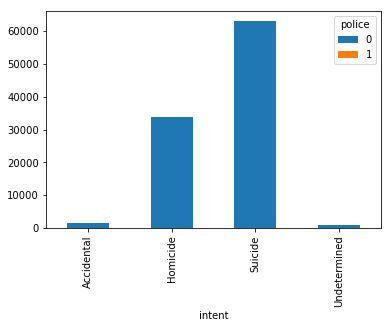

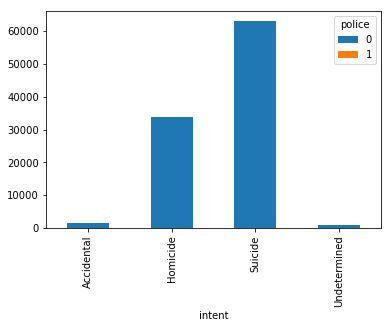

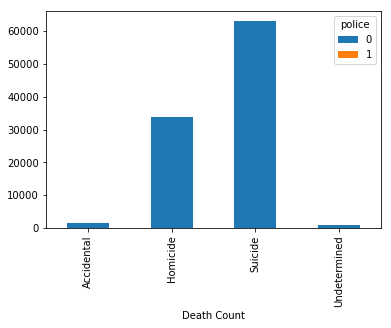

In [153]:
intentAndPolice = guns.groupby([guns.intent, guns.police]).intent.count().unstack('police')
plot = intentAndPolice.plot(kind='bar', stacked=True)
plot.set_xlabel("Death Count")
plt.show()

In [138]:
type(t)

matplotlib.axes._subplots.AxesSubplot